Naszym zadaniem na tych zajęciach była minimalizacja mocy w poniższym mostku rezystorownym.
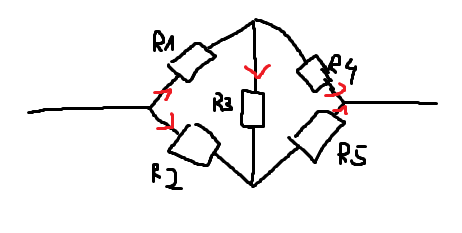



1. R1:  U1 = 6V, I1 = 4mA
2. R2:  U2 = 10V, I2 = 2mA
3. R3:  U3 = 4V, I3 = 2mA
4. R4:  U4 = 7V, I4 = 2mA
5. R5:  U5 = 3V, I5 = 4mA
6. Dla wszystkich R deltai = 1mA



In [ ]:
import numpy as np
from pulp import *

prob = LpProblem("Minimalizacja mocy",LpMinimize)

i1=LpVariable("I_1", 0.003, 0.005, LpContinuous)
i2=LpVariable("I_2", 0.001, 0.003, LpContinuous)
i3=LpVariable("I_3", 0.001, 0.003, LpContinuous)
i4=LpVariable("I_4", 0.001, 0.003, LpContinuous)
i5=LpVariable("I_5", 0.003, 0.005, LpContinuous)
 
U = (6.0, 10.0, 4.0, 7.0, 3.0)

prob += U[0]*i1 + U[1]*i2 + U[2]*i3 + U[3]*i4 + U[4]*i5, "Pmax"

prob += i1-i3 == i4, "I1" 
prob += i2+i3 == i5, "I2"

prob.writeLP("mostek.lp")

prob.solve()
print("Status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue, 'A')

print()

print("Straty =", value(prob.objective), "W\n")  

for v, k in zip(U, prob.variables()):
  print("R",U.index(v)+1,"=",(v/k.varValue/1000),"kohm")

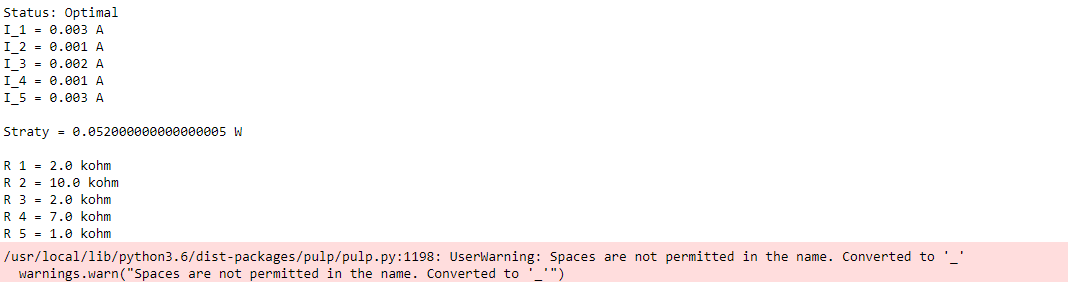